In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 3

Objective is to analyze Jacobi, Gauss-Seidel and relaxation method in the case of a tridiagonal matrix obtained by discretizing the diffusion operator. The matrix $A \in M_n(\mathbb{R})$ is given by 

\begin{equation}
A = \begin{pmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \cdots & 0 \\
0 & -1 & 2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2
\end{pmatrix} \in M_n(\mathbb{R}).
\end{equation}

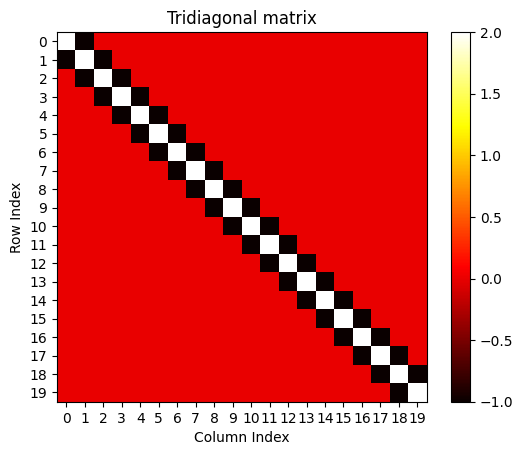

In [11]:
def tridiag(n,a,b,c):
    """ 
    Creates a tridiagonal matrix of size n x n 
    """
    matrix = np.zeros((n, n))
    np.fill_diagonal(matrix, b)
    np.fill_diagonal(matrix[:-1, 1:], a)
    np.fill_diagonal(matrix[1:, :-1], c)
    return matrix

n= 20
a = -1
b = 2
c = -1
A = tridiag(n, a, b, c)
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Tridiagonal matrix')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.xticks(np.arange(n), np.arange(n))
plt.yticks(np.arange(n), np.arange(n))
plt.grid(False)
plt.show()

In [12]:
def check_diagonal_dominance(matrix):
    """ 
    Checks if a matrix is diagonally dominant
    """
    n = matrix.shape[0]
    for i in range(n):
        # obtain the diagonal elements
        diag_element = abs(matrix[i, i])
        # this must be bigger than the sum of the of diagonal elements
        off_diag_sum = sum(abs(matrix[i, j]) for j in range(n) if j != i)
        if diag_element < off_diag_sum:
            return False
    return True

# Check if the tridiagonal matrix is diagonally dominant
check_diagonal_dominance(A)

True

## Part 1 write a python code to factorize A using Jacobi, Gauss-Seidel and SOR Methods


**Jacobi Method**:

In general a $n \times n$ matrix $A$ is strictly diagonally dominant if for each $i$, $1 \leq i \leq n$, $|a_{ii}| > \sum_{j \neq i} |a_{ij}|$. The Jacobi method converges for strictly diagonally dominant matrices.

We can rewrite the linear System $Ax = b$ as:

\begin{equation}
(L + D + U)x  = b
\end{equation}

where $L$ is the lower triangular part of $A$, $D$ is the diagonal part of $A$, and $U$ is the upper triangular part of $A$.

Rewriting the equation 20 gives

\begin{equation}
x = D^{-1}(b - (L + U)x)
\end{equation}

Thus we can denote the Jacobi iteration as:

\begin{equation}
x^{(k+1)} = D^{-1}(b - (L + U)x^{(k)})
\end{equation}

In [13]:
def jacobi(A,b,x_0,k):
    """ 
    Performs k steps of the jacobi method

    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    k: number of iterations to perform
    """
    d = np.diag(A)
    r = A - np.diag(d) # remainder of A after removing diagonal
    # Initialize the solution vector
    x = np.copy(x_0)
    for j in range(k):
        x = (b - np.dot(r, x)) / d
    return x




In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [24]:
# Test the Jacobi method
A = tridiag(2, -1, 2, -1)  # 2x2 tridiagonal matrix
n = 2
b = np.ones(n)  # Right-hand side vector
x0 = np.zeros(n)  # Initial guess
k = 25

fig, ax = plt.subplots(figsize=(12,5))
true_sol = np.linalg.solve(A, b)  # True solution for comparison

def animate(i):
    ax.cla()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    x = jacobi(A, b, x0, i)
    ax.plot(x[0], x[1], "o", ms=8, label="Jacobi")
    ax.plot(true_sol[0], true_sol[1], "o", ms=8, label="True Solution")
    ax.axhline()
    ax.axvline()
    ax.set_title(f"Jacobi Method Iteration {i}")
    ax.legend()
plt.close()
anim = FuncAnimation(fig, animate, frames=k, interval=100, repeat=False)
HTML(anim.to_html5_video())


**Gauss-Seidel Method**:

We can equivalently derive the Gauss-Seidel Iteration with the matrix notation:

\begin{equation}
(L + D)x = b - Ux
\end{equation}

Which gives us the Iteration:

\begin{equation}
(L + D)x^{(k+1)} = b - Ux^{(k)}
\end{equation}

which can be rewritten as:

\begin{equation}
x^{(k+1)} = D^{-1}(b-Ux^{(k)} - Lx^{(k+1)})
\end{equation}

In [16]:
def Gauss_Seidel(A,b,x_0,k):
    """ 
    Performs k steps of the Gauss-Seidel method

    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    k: number of iterations to perform
    """
    n = A.shape[0]
    x = x_0.copy()

    for l in range(k):
        for i in range(n):
            sum = 0
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x[j] # Just rewritte Ux^k - Lx⁽k+1)
            x[i] = (b[i] - sum) / A[i, i]
    return x



In [25]:
# Example usage of the Gauss-Seidel method
A = tridiag(2, -1, 2, -1)  # 2x2 tridiagonal matrix
n = 2
b = np.ones(n)  # Right-hand side vector
x0 = np.zeros(n)  # Initial guess
k = 25
fig, ax = plt.subplots(figsize=(12,5))
true_sol = np.linalg.solve(A, b)  # True solution for comparison
def animate_gs(i):
    ax.cla()
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    x = Gauss_Seidel(A, b, x0, i)
    ax.plot(x[0], x[1], "o", ms=8, label="Gauss-Seidel")
    ax.plot(true_sol[0], true_sol[1], "o", ms=8, label="True Solution")
    ax.axhline()
    ax.axvline()
    ax.set_title(f"Gauss-Seidel Method Iteration {i}")
    ax.legend()
plt.close()
anim_gs = FuncAnimation(fig, animate_gs, frames=k, interval=100, repeat=False)
HTML(anim_gs.to_html5_video())

**SOR Method**:

The SOR Method introduces a additional relaxation parameter if $\omega=1$ it is analogous to the Gauss-Seidel Method. 

To derive this we consider

\begin{equation}
\omega(L+D+U)x = \omega b
\end{equation}

\begin{equation}
(\omega(L + U) + (\omega - 1)D + D)x = \omega b
\end{equation}

which finally gives us the iteration:

\begin{equation}
x^{(k+1)} = D^{-1}\omega(b - Ux^{(k)} - Lx^{(k+1)}) + (1- \omega)x^{(k)}
\end{equation}

In [ ]:
def SOR(A,b,x_0,omega,k):
    """ 
    Performs k steps of th SOR method
    A: matrix of coefficients
    b: right hand side vector
    x_0: initial guess vector
    omega: relaxation factor (0 < omega < 2)
    k: number of iterations to perform
    """